In [5]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [7]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print("HEllllllllaaaaaa")
    print(y,y.shape) 
    break

tf.Tensor(
[[[[136.5  130.5  140.5 ]
   [122.75 116.75 126.75]
   [133.   127.   137.  ]
   ...
   [150.75 144.75 156.75]
   [145.   139.   151.  ]
   [146.5  140.5  152.5 ]]

  [[138.5  132.5  142.5 ]
   [131.25 125.25 135.25]
   [123.75 117.75 127.75]
   ...
   [148.   142.   154.  ]
   [150.75 144.75 156.75]
   [150.   144.   156.  ]]

  [[131.75 125.75 135.75]
   [129.5  123.5  133.5 ]
   [132.5  126.5  136.5 ]
   ...
   [147.75 141.75 153.75]
   [149.   143.   155.  ]
   [150.75 144.75 156.75]]

  ...

  [[152.75 146.75 156.75]
   [160.25 154.25 164.25]
   [151.25 145.25 155.25]
   ...
   [171.5  165.5  177.5 ]
   [167.75 161.75 173.75]
   [165.25 159.25 171.25]]

  [[152.   146.   156.  ]
   [141.5  135.5  145.5 ]
   [153.5  147.5  157.5 ]
   ...
   [161.5  155.5  167.5 ]
   [171.25 165.25 177.25]
   [165.5  159.5  171.5 ]]

  [[146.75 140.75 150.75]
   [145.   139.   149.  ]
   [154.5  148.5  158.5 ]
   ...
   [170.   164.   176.  ]
   [169.75 163.75 175.75]
   [166.   160.   17

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [11]:
model=Sequential()

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
from tensorflow.keras.layers import Dropout
model.add(Dropout(0.25))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.40))

In [21]:
model.add(Dense(units=38,activation='softmax'))

In [22]:
model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
trained=model.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20
   2/2197 ━━━━━━━━━━━━━━━━━━━━ 2:45 75ms/step - accuracy: 0.0312 - loss: 5.3846   

I0000 00:00:1717939581.444955     272 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717939581.464992     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3918 - loss: 2.1589

W0000 00:00:1717939710.530796     274 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717939711.923070     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 182s 73ms/step - accuracy: 0.3919 - loss: 2.1586 - val_accuracy: 0.8285 - val_loss: 0.5426
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.8382 - loss: 0.5207 - val_accuracy: 0.9005 - val_loss: 0.2998
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 115s 52ms/step - accuracy: 0.9067 - loss: 0.2886 - val_accuracy: 0.9228 - val_loss: 0.2419
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9384 - loss: 0.1897 - val_accuracy: 0.9398 - val_loss: 0.1888
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 118s 54ms/step - accuracy: 0.9534 - loss: 0.1421 - val_accuracy: 0.9580 - val_loss: 0.1326
Epoch 6/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 118s 54ms/step - accuracy: 0.9660 - loss: 0.1040 - val_accuracy: 0.9604 - val_loss: 0.1268
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 116s 52ms/step - accuracy: 0.9708 - loss: 0.0880 - val_accuracy: 0.9559 - val_loss: 0.1454
Epoch 8/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9759 - lo

**Saving the Model**

In [48]:
model.save("trained_model_V22.keras")


**Evaluating the Model**

In [26]:
cnn=model

In [27]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.9955 - loss: 0.0139
Training accuracy: 0.9957891702651978


W0000 00:00:1717941948.772318     275 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [28]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9727 - loss: 0.1075
Validation accuracy: 0.9726269245147705


In [29]:
trained.history #Return Dictionary of history

{'accuracy': [0.5932000875473022,
  0.8615975379943848,
  0.9144320487976074,
  0.9415605664253235,
  0.9550750255584717,
  0.9663134217262268,
  0.9711644053459167,
  0.9757024049758911,
  0.9794295430183411,
  0.9814069271087646,
  0.9846076965332031,
  0.9844369888305664,
  0.9861868023872375,
  0.9880503416061401,
  0.9878369569778442,
  0.9892452955245972,
  0.9899850487709045,
  0.9906678795814514,
  0.9912511706352234,
  0.991450309753418],
 'loss': [1.3801449537277222,
  0.4428499937057495,
  0.2647881507873535,
  0.18082195520401,
  0.13745342195034027,
  0.10287230461835861,
  0.0881369560956955,
  0.07470452040433884,
  0.061963748186826706,
  0.057102229446172714,
  0.047947730869054794,
  0.048144787549972534,
  0.04540778324007988,
  0.03740072250366211,
  0.038142647594213486,
  0.03289671242237091,
  0.03281030431389809,
  0.029385456815361977,
  0.02797633782029152,
  0.027236897498369217],
 'val_accuracy': [0.8285340070724487,
  0.9005235433578491,
  0.922774851322174

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(trained.history,f)

In [31]:
print(trained.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


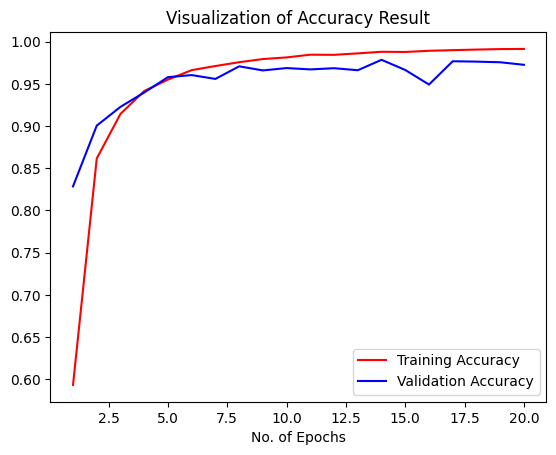

In [32]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,trained.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,trained.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [33]:
class_name = validation_set.class_names

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step


In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [37]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [38]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
cm = confusion_matrix(Y_true,predicted_categories)

In [40]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.95      0.97       504
                                 Apple___Black_rot       1.00      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.95      1.00      0.97       440
                                   Apple___healthy       0.98      0.97      0.97       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.96      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.93      0.

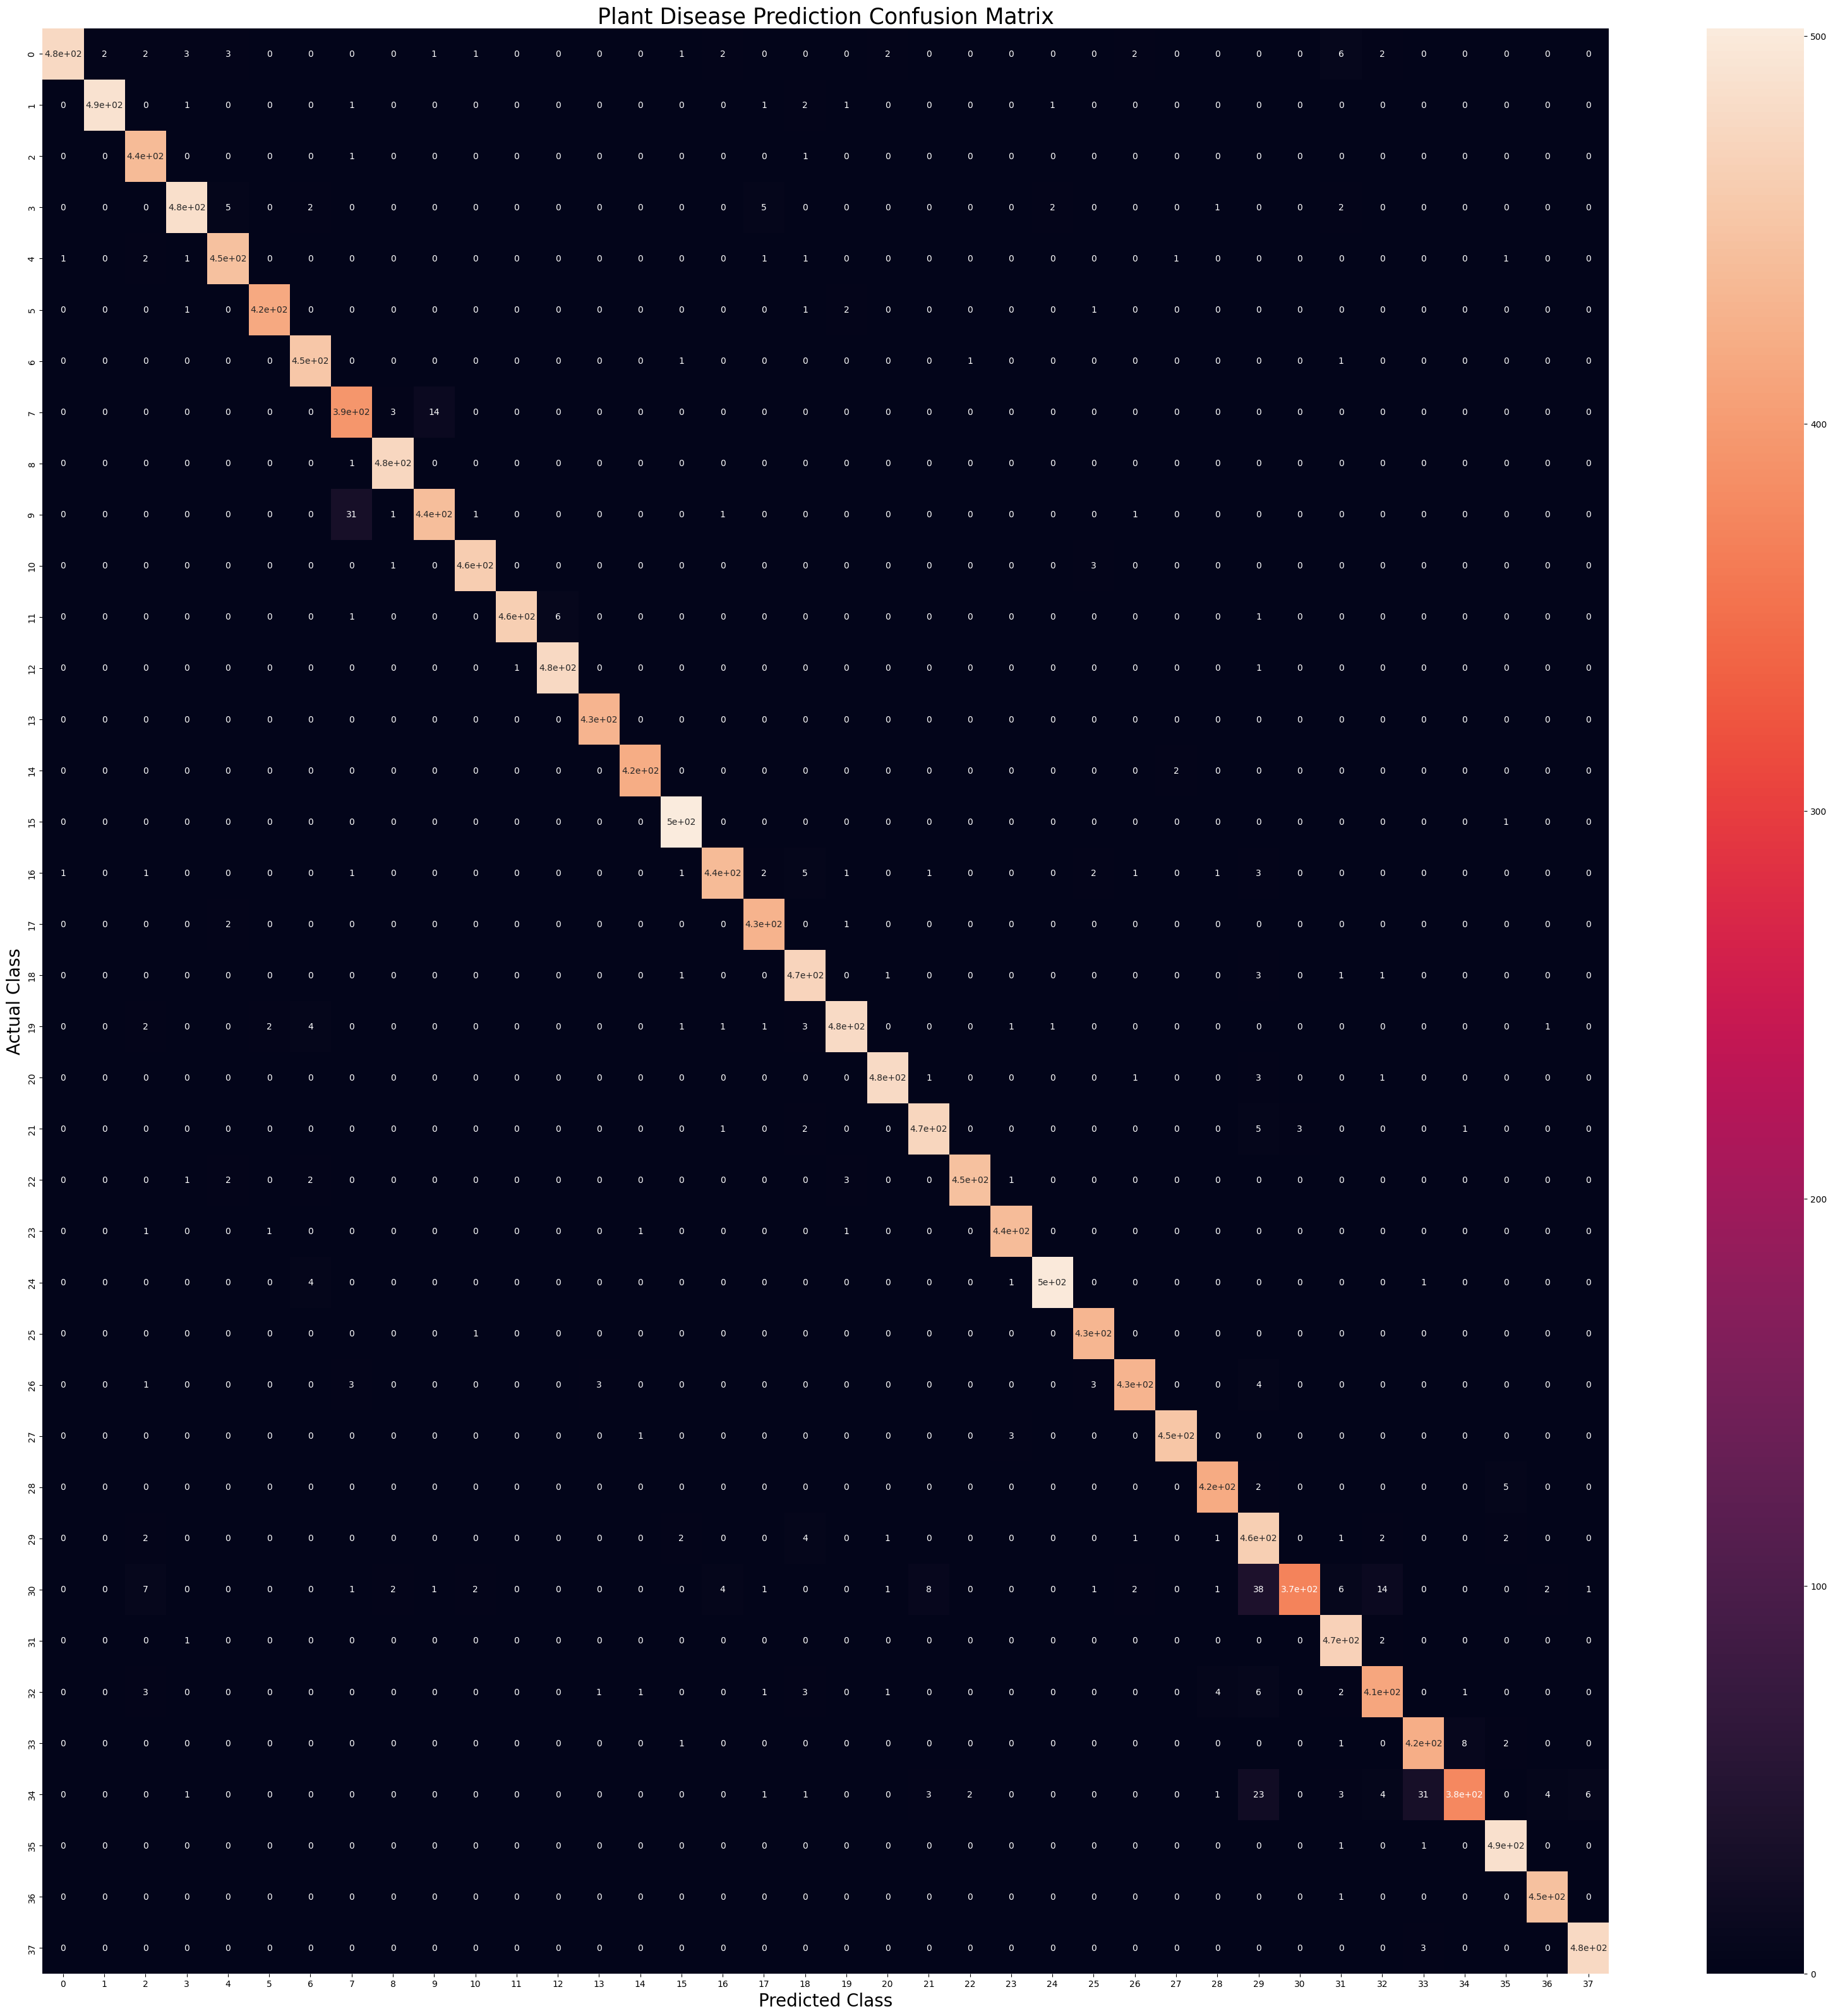

In [41]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

**Testing the Model**

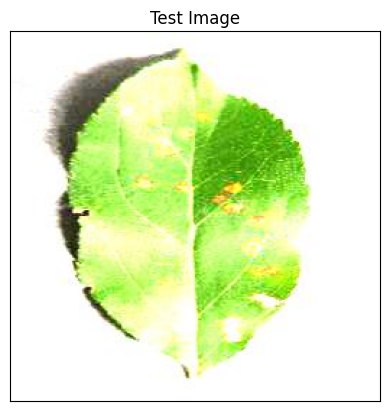

In [42]:
#Test Image Visualization
import cv2
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [44]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


In [45]:
print(predictions)

[[5.8378874e-17 5.8293641e-17 1.0000000e+00 3.9047392e-21 1.5540146e-15
  7.9564409e-16 3.8037226e-21 4.6575416e-20 3.9512153e-23 2.6233475e-22
  2.2304309e-26 1.6389912e-20 7.9076061e-23 7.4773729e-25 5.1828717e-22
  3.7631339e-16 2.5146302e-17 2.6205535e-17 3.8524746e-17 2.1010440e-17
  6.5936099e-22 3.7344906e-23 1.9326573e-18 6.4041745e-20 3.3164353e-23
  1.2248889e-23 1.0902000e-22 6.1169638e-22 3.1286620e-16 2.7306855e-19
  1.4366125e-18 2.9145929e-20 4.1993722e-18 7.9841969e-24 5.4746142e-17
  6.8517831e-19 1.0835684e-18 2.0921803e-19]]


In [46]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


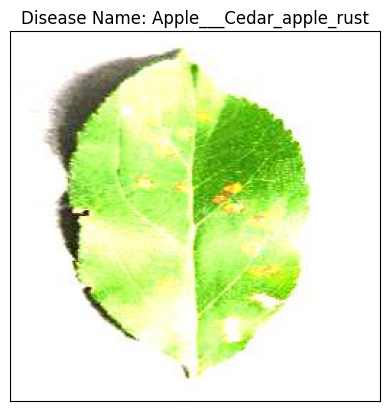

In [47]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()